# Bayes starting point search

The idea here is to use an approximation of Bayesian model comparison to identify the starting point `x1` where the linar part of a given time series transitions toa sigmoidal part

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import random

## Generate synthetic data

To be able to assess the quality of our model we first generate a large number of synthetic traces plus the correct `x1`.

In [4]:
random.seed(123)  # For repeatability

N = 10  # number of traces
data = pd.DataFrame()

for i in range(N):
    S = random.randint(170, 400)  # number of samples
    y0 = random.uniform(1, 20)  # offset
    s = random.uniform(-0.2, 0.2)  # slope of linear part
    std = random.uniform(3, 15)  # noise
    x12 = random.randint(80, S - 80)  # halfway-point of sigmoid
    xSigWidth = random.uniform(0.5, 30)  # width scaling factor of sigmoid
    ySig = random.uniform(20, 300)  # height of sigmoid
    xTrue = x12 - xSigWidth  # The "true" starting point

    x = np.arange(start=0, stop=S)
    y = (
        y0
        + s * x
        + ySig * (0.5 + 0.5 * np.tanh((x - x12) / xSigWidth))
        + np.random.normal(scale=std, size=S)
    )
    data = data.append(
        {"x": x, "y": y, "S": S, "x12": x12, "xSigWidth": xSigWidth, "xTrue": xTrue},
        ignore_index=True,
    )

In [5]:
data.head()

,S,x,x12,xSigWidth,xTrue,y
0,183.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",81.0,11.684168,69.315832,"[8.143203837413182, 5.814643600674254, 8.72230..."
1,257.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",122.0,21.199849,100.800151,"[15.135518484910971, 12.158155381269825, 13.72..."
2,281.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",80.0,9.806040,70.193960,"[32.07363469736771, 16.483961503804906, 22.104..."
3,181.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",80.0,9.108145,70.891855,"[-2.307429483645586, -34.43348232794989, 8.283..."
4,292.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",167.0,15.889272,151.110728,"[3.3397927695815195, -3.480351389763963, 13.06..."


<IPython.core.display.Javascript object>


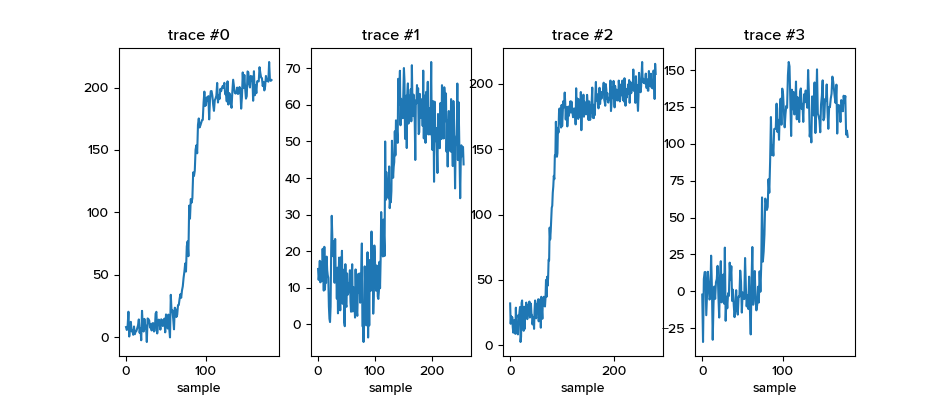

In [6]:
fig = plt.figure(figsize=(9.5, 4))

for i in range(min(N, 4)):
    trace = data.loc[i]
    p = fig.add_subplot(1, 4, i + 1)
    p.set(
        xlabel="sample", title=f"trace #{i}",
    )
    p.plot(trace.x, trace.y)
    p.axvline(x=trace.xTrlinewidth=1, color='r')